# Homework 7 Solutions

# Problem 1

#### Download the file LostHills.xls. At every depth data point along the vertical well:

In [1]:
import pandas as pd

excel_file = 'HW7.xlsx'
DataQ1Summary = pd.read_excel(excel_file,sheet_name="Q1")
DataQ1Summary.head(167)

,Depth [ft],Depth [m],Pp [psi],Pp [MPa],Density [g/cc],Density [kg/m3],dt-comp [us/ft],dt-shear [us/ft],φ [-],vp [m/s],...,Sh [psi],σh [psi],Shmax [psi],σhmax [psi],Shmax [MPa],σhmax [MPa],Shmin [psi],σhmin [psi],Shmin [MPa],σhmin [MPa]
0,1750,533,700,4.826,1.87,1870,177.3271,477.1760,0.37,1719,...,1219,519,1592,892,10.980,6.154,1376,676,9.490,4.664
1,1755,535,702,4.840,1.86,1860,176.3417,479.4971,0.38,1728,...,1221,519,1589,887,10.970,6.130,1376,674,9.504,4.664
2,1760,536,704,4.854,1.85,1850,180.1919,481.2379,0.39,1692,...,1213,509,1574,870,10.854,6.000,1364,660,9.410,4.556
3,1765,538,706,4.868,1.86,1860,179.5510,482.3984,0.38,1698,...,1224,518,1586,880,10.951,6.083,1376,670,9.501,4.633
4,1770,539,708,4.881,1.87,1870,177.1933,472.7273,0.37,1720,...,1229,521,1607,899,11.085,6.204,1387,679,9.567,4.686
5,1775,541,710,4.895,1.83,1830,167.9760,473.3076,0.40,1815,...,1231,521,1606,896,11.087,6.192,1391,681,9.607,4.712
6,1780,543,712,4.909,1.86,1860,170.4306,481.2379,0.38,1788,...,1252,540,1621,909,11.189,6.280,1410,698,9.737,4.828
7,1785,544,714,4.923,1.77,1770,188.3189,469.2456,0.39,1619,...,1157,443,1512,798,10.436,5.513,1301,587,8.977,4.054
8,1790,546,716,4.937,1.88,1880,160.5894,455.5126,0.37,1898,...,1273,557,1689,973,11.667,6.730,1452,736,10.026,5.089
9,1795,547,718,4.950,1.86,1860,152.6213,475.8221,0.38,1997,...,1297,579,1685,967,11.626,6.676,1469,751,10.136,5.186


#### a) Compute total vertical stress as a function of depth (you may assume homogeneous rock above 1750 ft), and compute overpressure parameter.

Total vertical stress can be found through the integration of bulk rock densities from the surface to the depth of interest, z

$$S_v=\int_0^z \rho g z \: \mathrm{d}z$$

Summing the overburden stress of each depth interval below the depth of interest will give the total vertical stress at that depth

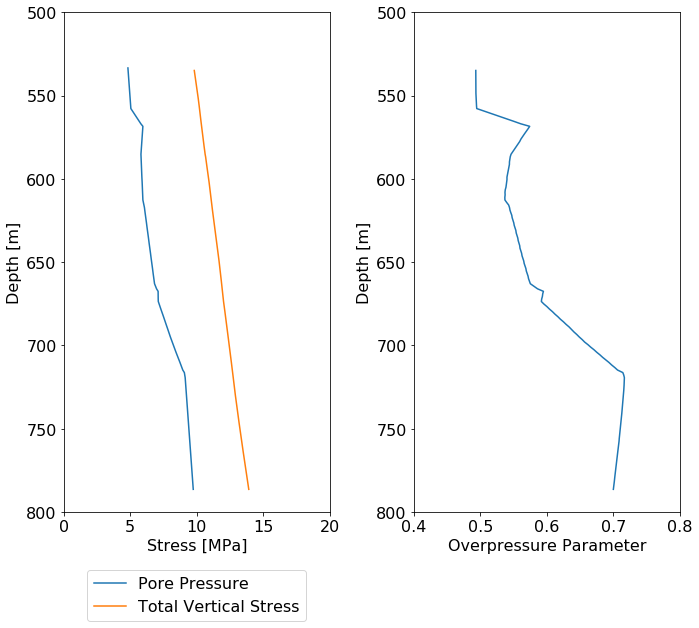

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Depth = DataQ1Summary['Depth [ft]'] * 0.3048 # [ft] -> [m]
Depth1 = DataQ1Summary['Depth [ft]'] # [ft]
Pp = DataQ1Summary['Pp [psi]'] * 0.00689476 # [psi] -> [MPa]
rho = DataQ1Summary['Density [g/cc]'] * 1000 # [g/cc] -> [kg/m3]
rho1 = DataQ1Summary['Density [g/cc]']
gravity = 9.81 # [m/s2]

# We are told the rock above 1750 ft is homogeneous, so we can calculate the overburden up till 1750 ft.
dZ = np.diff(np.linspace(0,Depth.iloc[0]))
offsetSv = np.sum(dZ*gravity*rho.iloc[0])
deltaZ = Depth.diff(1)
Sv = offsetSv + np.cumsum(gravity*rho*deltaZ) # Total Vertical Stress [Pa]
Sv = Sv*(1e-6) # [Pa] -> [MPa]
Sv1 = Sv*145.038 # [MPa] -> [psi]

# Calculate Overpressure Parameter [-]
lambdaP = Pp/Sv 

# Figure size
fig = plt.figure(figsize=(10,9))

# Plot Sv and Pp
ax = fig.add_subplot(121)
ax.plot(Pp,Depth,label = 'Pore Pressure')
ax.plot(Sv,Depth,label = 'Total Vertical Stress')
# Plot labels
ax.set_xlabel("Stress [MPa]")
ax.set_ylabel("Depth [m]")
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
# Axis range
plt.xlim([0, 20])
plt.ylim([800, 500])

# Plot Overpressure
ax2 = fig.add_subplot(122)
ax2.plot(lambdaP,Depth)
# Plot labels
ax2.set_xlabel("Overpressure Parameter")
ax2.set_ylabel("Depth [m]")
# Axis range
plt.xlim([0.4, 0.8])
plt.ylim([800, 500])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

#### b) Compute dynamic Poisson’s ratio and dynamic Young’s modulus from compressive and shear slowness (be careful with unit conversion).

Dynamic Poisson’s ratio (v) can be calculated using the below formula. 

$$v=\frac{(V_p^2-2V_s^2)}{2(V_p^2-V_s^2)}=\frac{[(V_p/V_s )^2-2]}{2[(V_p/V_s )^2-1]}$$

P-wave velocity (V_p) and S-wave velocity (V_s) [m/s] can be calculated from the slowness (dt) [$\mu s/ft$]

$$V=\frac{10^6}{dt}*0.3048$$ 

Dynamic Young’s modulus (E) can be calculated using the below formulas, where K is the bulk modulus and G is the shear modulus. Density ($\rho$) in [$kg/m^3$] and velocities in [m/s] will give you modulus in units of [Pa]

$$E=\frac{9KG}{(3K+G)}$$
<br>
$$G=ρ V_s^2$$
<br>
$$K=ρ(V_p^2- \frac{4}{3} V_s^2 )$$

Dynamic Young’s modulus (E) can also be calculated using the below formulas

$$E=ρV_p^2\frac{(1+v)(1-2v)}{(1-v)}$$
<br>
$$E=ρV_s^2\frac{[3(V_p/V_s )^2-4]}{[(V_p/V_s )^2-1]}$$


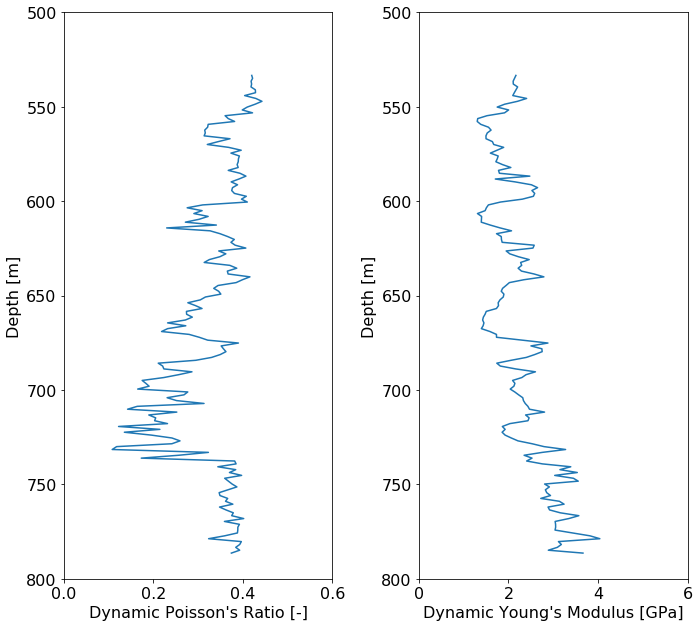

In [5]:
Vp = 1/(DataQ1Summary['dt-comp [us/ft]'] * (1e-6)/0.3048) # P-wave Slowness [us/ft] -> P-Wave Velocity [km/s]
Vs = 1/(DataQ1Summary['dt-shear [us/ft]'] * (1e-6)/0.3048) # S-wave Slowness [us/ft] -> S-Wave Velocity [km/s]

M = (Vp**2)*rho1 # Constrained Modulus []
G = (Vs**2)*rho1

v_Dyn = (Vp**2 - 2*(Vs**2))/(2*(Vp**2 - Vs**2)) # Dynamic Poisson's Ratio [-]
E_Dyn = rho*(Vs**2)*((3*(Vp**2) - 4*(Vs**2))/((Vp**2) - (Vs**2)))*1e-9 # Dynamic Young's Modulus [GPa]
E_Dyn1 = E_Dyn *145038 /1000 # [Mpsi]

# Figure size
fig = plt.figure(figsize=(10,9))

# Plot v
ax = fig.add_subplot(121)
ax.plot(v_Dyn,Depth)
# Plot labels
ax.set_xlabel("Dynamic Poisson's Ratio [-]")
ax.set_ylabel("Depth [m]")
# Axis range
plt.xlim([0, 0.6])
plt.ylim([800, 500])

# Plot E
ax1 = fig.add_subplot(122)
ax1.plot(E_Dyn,Depth)
# Plot labels
ax1.set_xlabel("Dynamic Young's Modulus [GPa]")
ax1.set_ylabel("Depth [m]")
# Axis range
plt.xlim([0, 6])
plt.ylim([800, 500])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

#### c) Compute static Young’s modulus using a coefficient $E_{static} = 0.65 \times E_{dynamic}$

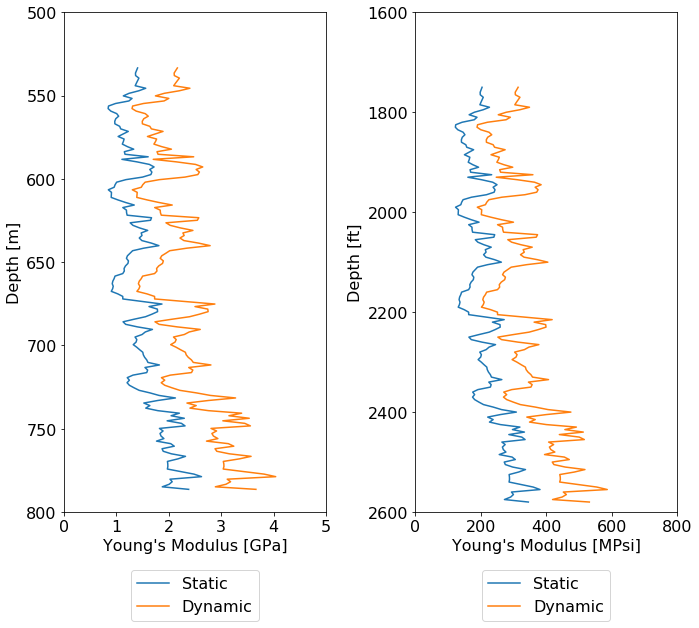

In [6]:
E_Static = E_Dyn*0.65 # [GPa]
E_Static1 = E_Static *145038 /1000 # [Mpsi]

# Figure size
fig = plt.figure(figsize=(10,9))

# Plot E in SI
ax = fig.add_subplot(121)
ax.plot(E_Static,Depth,label = "Static")
ax.plot(E_Dyn,Depth,label = "Dynamic")
# Plot labels
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax.set_xlabel("Young's Modulus [GPa]")
ax.set_ylabel("Depth [m]")
# Axis range
plt.xlim([0, 5])
plt.ylim([800, 500])

# Plot E in Field
ax1 = fig.add_subplot(122)
ax1.plot(E_Static1,Depth1,label = "Static")
ax1.plot(E_Dyn1,Depth1,label = "Dynamic")
# Plot labels
ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax1.set_xlabel("Young's Modulus [MPsi]")
ax1.set_ylabel("Depth [ft]")
# Axis range
plt.xlim([0, 800])
plt.ylim([2600, 1600])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

#### d) Compute static plane strain modulus $E’_{static} = E_{static} / (1-ν^2)$ (Poisson ratio remains the same with depth).

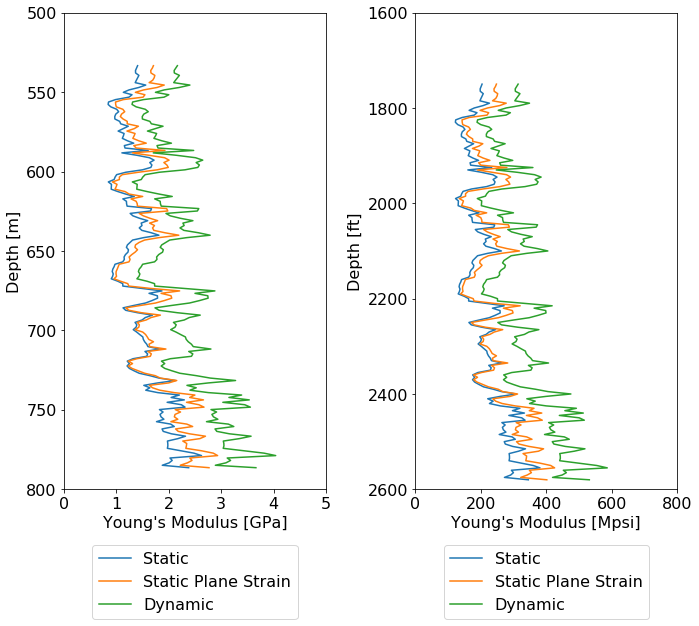

In [7]:
E_Static_Plane = E_Static/(1-v_Dyn**2) # [GPa]
E_Static_Plane1 = E_Static_Plane *145038 /1000 # [Mpsi]

# Figure size
fig = plt.figure(figsize=(10,9))

# Plot in SI
ax = fig.add_subplot(121)
ax.plot(E_Static,Depth,label = "Static")
ax.plot(E_Static_Plane,Depth,label = "Static Plane Strain")
ax.plot(E_Dyn,Depth,label = "Dynamic")
# Plot labels
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax.set_xlabel("Young's Modulus [GPa]")
ax.set_ylabel("Depth [m]")
# Axis range
plt.xlim([0, 5])
plt.ylim([800, 500])

# Plot in Field
ax1 = fig.add_subplot(122)
ax1.plot(E_Static1,Depth1,label = "Static")
ax1.plot(E_Static_Plane1,Depth1,label = "Static Plane Strain")
ax1.plot(E_Dyn1,Depth1,label = "Dynamic")
# Plot labels
ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax1.set_xlabel("Young's Modulus [Mpsi]")
ax1.set_ylabel("Depth [ft]")
# Axis range
plt.xlim([0, 800])
plt.ylim([2600, 1600])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

#### e) Compute total maximum and minimum horizontal stress assuming theory of elasticity and $\epsilon_{Hmax}=0.0015$ and $\epsilon_{hmin}=0$.

The maximum effective horizontal stress is given by

$$\sigma_{Hmax}=\frac{E}{1-v^2}\epsilon_{Hmax}+\frac{vE}{1-v^2}\epsilon_{Hmin}+\frac{v}{1-v}\sigma_{V}$$

The minimum effective horizontal stresses is given by

$$\sigma_{Hmin}=\frac{vE}{1-v^2}\epsilon_{Hmax}+\frac{E}{1-v^2}\epsilon_{Hmin}+\frac{v}{1-v}\sigma_{V}$$


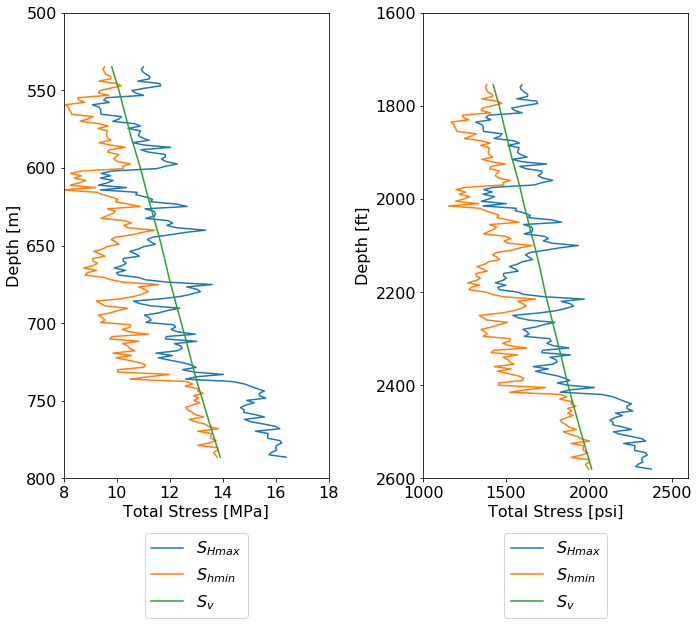

In [8]:
eHmax = 0.0015
ehmin = 0
Ep = E_Static_Plane*(1e3) # [GPa] -> [MPa]
sigV = Sv - Pp # [MPa]
sigHmax = Ep*eHmax + v_Dyn*Ep*ehmin + sigV*(v_Dyn/(1-v_Dyn)) # [MPa]
sighmin = v_Dyn*Ep*eHmax + Ep*ehmin + sigV*(v_Dyn/(1-v_Dyn)) # [MPa]
SHmax = sigHmax + Pp # [MPa]
Shmin = sighmin + Pp # [MPa]
SHmax1 = SHmax *145.038 # [psi]
Shmin1 = Shmin *145.038 # [psi]

# Figure size
fig = plt.figure(figsize=(10,9))

# Plot in SI
ax = fig.add_subplot(121)
ax.plot(SHmax,Depth,label = "$S_{Hmax}$")
ax.plot(Shmin,Depth,label = "$S_{hmin}$")
ax.plot(Sv,Depth,label = "$S_{v}$")
# Plot labels
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax.set_xlabel("Total Stress [MPa]")
ax.set_ylabel("Depth [m]")
# Axis range
plt.xlim([8, 18])
plt.ylim([800, 500])

# Plot in Field
ax1 = fig.add_subplot(122)
ax1.plot(SHmax1,Depth1,label = "$S_{Hmax}$")
ax1.plot(Shmin1,Depth1,label = "$S_{hmin}$")
ax1.plot(Sv1,Depth1,label = "$S_{v}$")
# Plot labels
ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax1.set_xlabel("Total Stress [psi]")
ax1.set_ylabel("Depth [ft]")
# Axis range
plt.xlim([1000, 2600])
plt.ylim([2600, 1600])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

#### f) The pay-zone is between 2,100 ft and 2,450 ft. A hydraulic fracture is planned to be executed with a vertical well at a depth between 2,130 ft and 2,160 ft. What will be the height of this fracture? Will it reach out to the entire pay zone?

A hydraulic fracture will open perpendicular to least principal stress. Since for the pay zone of interest we have the case of $S_V>S_{Hmax}>S_{hmin}$, we can expect hydraulic fractures to open up perpendicular to $S_{Hmin}$.

If a fracture is initiated between 2130 ft and 2160 ft (black boundary lines), the fracture will expand up and down until it reaches the region where the horizontal stress is significantly higher (local peaks at approximately 2100 and 2210 ft), making the height of the fracture a maximum of ~110ft. A second set of perforations between 2300 and 2400 ft may be needed to extend the hydraulic fracture through the entire pay zone

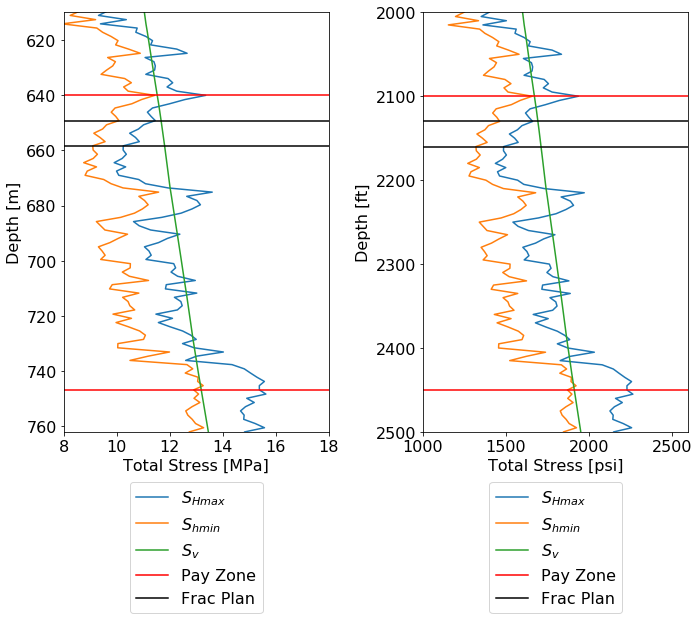

In [9]:
#Payzone
payUpperBound1 = 2100 # [ft]
payUpperBound = 2100 * 0.3048 # [m]
payLowerBound1 = 2450 # [ft]
payLowerBound = 2450 * 0.3048 # [m]

#Fracture Plan
fracUpperBound1 = 2130 # [ft]
fracUpperBound = 2130 * 0.3048 # [m]
fracLowerBound1 = 2160 # [ft]
fracLowerBound = 2160 * 0.3048 # [m]

# Figure size
fig = plt.figure(figsize=(10,9))

# Plot in SI
ax = fig.add_subplot(121)
ax.plot(SHmax,Depth,label = "$S_{Hmax}$")
ax.plot(Shmin,Depth,label = "$S_{hmin}$")
ax.plot(Sv,Depth,label = "$S_{v}$")
ax.plot([0,18e6],[payUpperBound,payUpperBound],'r',label='Pay Zone')
ax.plot([0,18e6],[payLowerBound,payLowerBound],'r')
ax.plot([0,18e6],[fracUpperBound,fracUpperBound],'k',label='Frac Plan')
ax.plot([0,18e6],[fracLowerBound,fracLowerBound],'k')
# Plot labels
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax.set_xlabel("Total Stress [MPa]")
ax.set_ylabel("Depth [m]")
# Axis range
plt.xlim([8, 18])
plt.ylim([762, 610])

# Plot in Field
ax1 = fig.add_subplot(122)
ax1.plot(SHmax1,Depth1,label = "$S_{Hmax}$")
ax1.plot(Shmin1,Depth1,label = "$S_{hmin}$")
ax1.plot(Sv1,Depth1,label = "$S_{v}$")
ax1.plot([0,2600],[payUpperBound1,payUpperBound1],'r',label='Pay Zone')
ax1.plot([0,2600],[payLowerBound1,payLowerBound1],'r')
ax1.plot([0,2600],[fracUpperBound1,fracUpperBound1],'k',label='Frac Plan')
ax1.plot([0,2600],[fracLowerBound1,fracLowerBound1],'k')
# Plot labels
ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=1)
ax1.set_xlabel("Total Stress [psi]")
ax1.set_ylabel("Depth [ft]")
# Axis range
plt.xlim([1000, 2600])
plt.ylim([2500, 2000])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

# Problem 2

#### A single hydraulic fracture treatment will be performed in a tight sandstone. The hydraulic fracture height is expected to be $h_f = 170 ft$. The tight sandstone has a plane-strain modulus E’ = 8.9 MMpsi. The (two-wing) injection rate will be 50 bbl/min (constant) during 1 hour. The fracturing fluid has a viscosity 2 cP. Compute:

In [10]:
import pandas as pd

excel_file = 'HW7.xlsx'
DataQ2Summary = pd.read_excel(excel_file,sheet_name="Q2")
DataQ2Summary.head(11)

,Parameter,Symbol,Value,-,t [min],t [sec],xf [m],"ww,0 [mm]",Pnet [MMPa]
0,Fracture Half Length,hf [ft],170.000000,-,0.00,0,0,0.000,0.000
1,Plane-Strain Modulus,E' [MMpsi],8.900000,-,0.25,15,19,1.608,0.952
2,Fracturing Fluid Viscosity,mu [cP],2.000000,-,1.00,60,58,2.122,1.256
3,One-Wing Injection Rate,i [bbl/min],25.000000,-,2.50,150,120,2.548,1.509
4,Injection Period,te [hour],1.000000,-,5.00,300,209,2.927,1.733
5,Fracture Half Length,hf [m],51.816000,-,10.00,600,363,3.363,1.991
6,Plane-Strain Modulus,E' [MMPa],61363.364000,-,20.00,1200,633,3.863,2.287
7,Fracturing Fluid Viscosity,mu [Pas],0.002000,-,30.00,1800,875,4.189,2.480
8,One-Wing Injection Rate,i [m3/s],0.066243,-,40.00,2400,1102,4.437,2.627
9,Injection Period,te [s],3600.000000,-,50.00,3000,1317,4.640,2.747


#### a) The expected fracture half-length $x_f$, fracture width at the wellbore $w_{w,0}$, and net pressure $p_n$ as a function of time with the PKN model (no leak-off).

Fracture half-length $x_f$ can be calculated:

$$x_f=0.524\left(\frac{i^3E'}{\mu h_f^4}\right)^{1/5} t^{4/5}$$

Fracture width at the wellbore $w_{w,0}$ can be calculated:

$$w_{w,0}=3.04\left(\frac{i^2 \mu}{E' h_f}\right)^{1/5} t^{1/5}$$

Net pressure $P_n$ can be calculated:

$$P_n=1.52\left(\frac{E'^4 i^2 \mu}{h_f ^6}\right)^{1/5} t^{1/5}$$

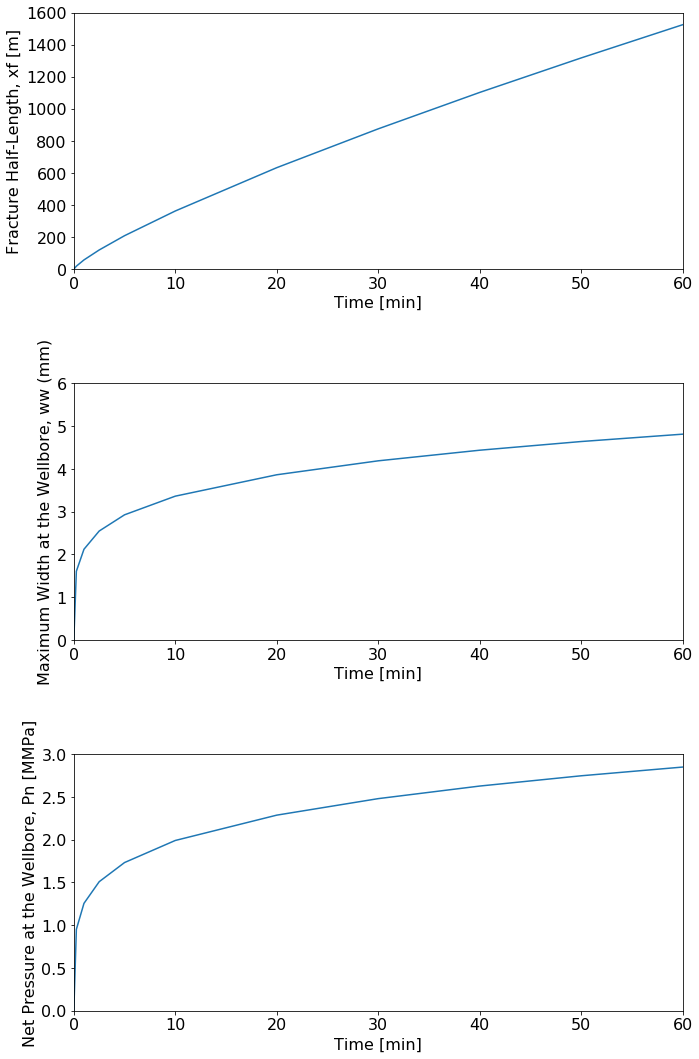

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Time = DataQ2Summary['t [min]']
xf = DataQ2Summary['xf [m]']
ww = DataQ2Summary['ww,0 [mm]']
Pnet = DataQ2Summary['Pnet [MMPa]'] 

# Figure size
fig = plt.figure(figsize=(10,15))

# Plot Fracture Half-Length
ax = fig.add_subplot(311)
ax.plot(Time,xf)
# Plot labels
ax.set_xlabel("Time [min]")
ax.set_ylabel("Fracture Half-Length, xf [m]")
# Axis range
plt.xlim([0, 60])
plt.ylim([0, 1600])

# Plot Maximum Width at the Wellbore
ax = fig.add_subplot(312)
ax.plot(Time,ww)
# Plot labels
ax.set_xlabel("Time [min]")
ax.set_ylabel("Maximum Width at the Wellbore, ww (mm)")
# Axis range
plt.xlim([0, 60])
plt.ylim([0, 6])

# Plot Fracture Half-Length
ax = fig.add_subplot(313)
ax.plot(Time,Pnet)
# Plot labels
ax.set_xlabel("Time [min]")
ax.set_ylabel("Net Pressure at the Wellbore, Pn [MMPa]")
# Axis range
plt.xlim([0, 60])
plt.ylim([0, 3])

# Set font size
plt.rcParams.update({'font.size': 16})
# Layout
plt.tight_layout()

#### b) The total amount of water (volume) and sand (weight) required assuming a constant volume ratio 90% water-10% sand. How many water swimming pools (100,000 L) and sand trucks (10 metric tons) are needed to complete the hydraulic fracturing job?

Fracture volume for one-wing is given by:

$$v_f = \overline w x_f h_f$$

Where for the PKN model

$$\overline w = \frac{\pi}{5} w_{w,0}$$

Two-wing fracture volume 2Vf = 477 $m^3$

90% water volume = 429 $m^3$ = 4.3 swimming pools

10% sand volume = 48 $m^3$ = 126.4 metric tons = 12.6 trucks

# Problem 3

#### Consider the design of a completion job with horizontal wellbores and multistage hydraulic fracturing in the Barnett shale at 8,200 ft with pore pressure of 4100 psi (NF).

#### a) What is the direction of horizontal wellbores that maximize drainage area using multistage fractures? (You may need to check the US stress map)

Wells must be drilled in the direction of S3 to maximize drainage surface area from multistage hydraulic fracturing. 

In the Barnett shale, a normal faulting stress environment prevails with SHmax striking at ~N60°E. Hence, wellbores should be drilled at an azimuth of N30°W or S30°E.

#### b) Sketch a horizontal well with 10 fracture stages spaced every 200ft from a top view. Fracture half-length is ~500ft.

![](files/HW7_Q3b.jpg)

#### c) Calculate a lower bound (absolute minimum) of the pressure needed to propagate hydraulic fractures using the theory of elasticity (ν=0.25) and limit equilibrium of faults (q~3.5). Perforations will be done, so you may ignore the effect of near-wellbore stresses.

The minimum pressure to open a hydraulic fracture is $P=S_3 (P_{net}=0)$. Thus, the problem is asking for Shmin.

Assuming linear elasticity with perfect containment:
$$\sigma_{hmin} = \left(\frac{ν}{1- ν}\right) \sigma_V = 0.333 \cdot (8200 psi – 4100 psi) = 1365 psi$$
<br>
$$S_{hmin} = \sigma_{hmin} + P_p = 5465 psi$$

Assuming shear equilibrium of faults:
$$\sigma_{hmin} = \left(\frac{1}{q}\right) \sigma_V = 0.286 \cdot (8200 psi – 4100 psi) = 1171 psi$$
$$S_{hmin} =  \sigma_{hmin} + P_p = 5271 psi$$


#### d) Draw the “path” of wellbore orientation on a semi-sphere projection. The wellbore starts vertical on the surface and deviates close to the pay zone until it gets horizontal.

![](files/HW7_Q3d.jpg)

# Problem 4

#### The following figures correspond to microseismicity images from hydraulic fracturing stimulation in the Barnett shale (Hydraulic Fracturing Insights from Microseismic Monitoring – SLB Oilfield Review https://www.slb.com/~/media/Files/resources/oilfield_review/ors16/May2016/02-microseismic.pdf).

![](files/HW7_Q4.jpg)

#### “Stimulation process performed on the three horizontal wells using plug and perf and slickwater treatment with fault traces mapped at laterals depth interval in cyan. The zipper-style frac performed on the 1H (central well in red) and the 3H (east well in yellow) was monitored from 2H (west well in green). The four stimulation stages performed on the 2H were monitored from the 3H.”

#### a) What is the length of the laterals? What is the distance between laterals? What is the approximate distance between stages? (axis units: feet) Note: 1H is 80 ft higher in elevation than 2H and 3H.

Length of laterals is ~3300 ft.

Distance between laterals is ~500 ft. 

Distance between stages is ~400-800 ft. 

#### b) What is the strike of the hydraulic fractures at the toe of the laterals? How does the strike interpreted from microseismicity compare to the strike obtained in problem 3?

Strike = N50°E (050°)

This is similar to the strike of 060° from problem 3. 

#### c) What is the average fracture half-length $x_f$ as interpreted from the microseismic cloud?

$x_f = 600 ft$

#### d Assuming a pay zone thickness of 200 ft, what is the Stimulated Reservoir Volume $[ft^3]$?

$Area = 2000ft \cdot 2000ft = 4 \cdot 10^6 ft^2$

$SRV = Area \cdot Height = 4 \cdot 10^6 ft^2 \cdot *200 ft = 8 \cdot 10^8 ft^3$